In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
house_price = load_boston()
df = pd.DataFrame(house_price.data ,columns= house_price.feature_names)
df['Price']= house_price.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df1= df.copy()

TIME FOR EDA

In [4]:
#Checking for null values
df1.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [5]:
df1.shape

(506, 14)

In [6]:
df1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


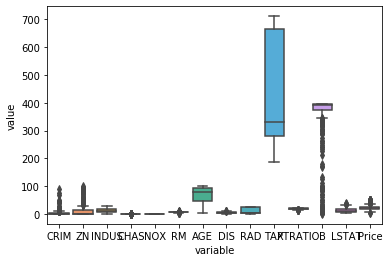

In [7]:
sns.boxplot(x="variable", y="value", data= pd.melt(df1))

plt.show()


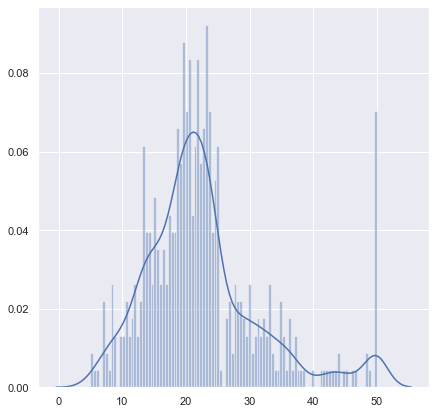

In [8]:
# Distribution of dependent variable
sns.set(rc={'figure.figsize':(7,7)})
sns.distplot(house_price.target, bins=100)
plt.show()

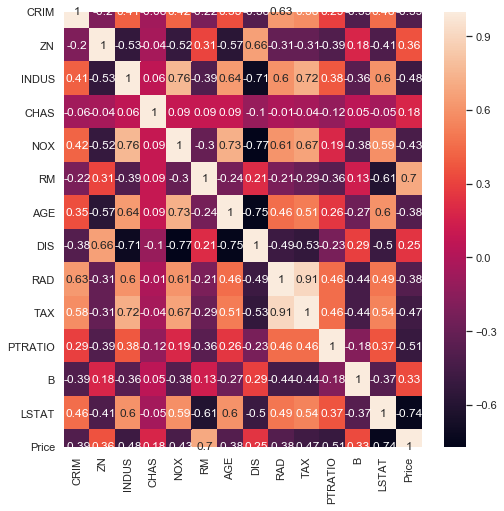

In [9]:
#Understanding the correlation between independent variables

plt.figure(figsize=(8,8))
sns.heatmap(df1.corr().round(2),annot=True)

LINEAR REGRESSION

In [10]:
x= df1.drop(['Price'],axis=1)
y= df1['Price']

In [11]:
# Splitting into train and test Dataset
X_train,X_test,y_train,y_test=train_test_split(x ,y, test_size = 0.3, random_state = 42)

In [12]:
model = LinearRegression(normalize= True)
# Fit the model 
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [13]:
# Predicting on test dataset
y_pred = model.predict(X_test)

In [14]:
score = r2_score(y_test,y_pred)
print(f'The R2 score for the linear regression model is: {score.round(3)}')

The R2 score for the linear regression model is: 0.711


CHECKING THE ASSUMPTIONS OF LINEAR REGRESSION IN TERMS OF RESIDUAL ERRORS

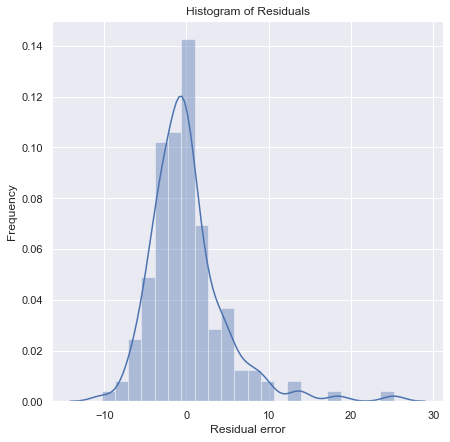

In [15]:
#Normalzied distribution
diff = y_test-y_pred
sns.distplot(diff)
plt.title("Histogram of Residuals")
plt.xlabel("Residual error")
plt.ylabel("Frequency")
plt.show()

#The histogram shows a normal distirbution of errros

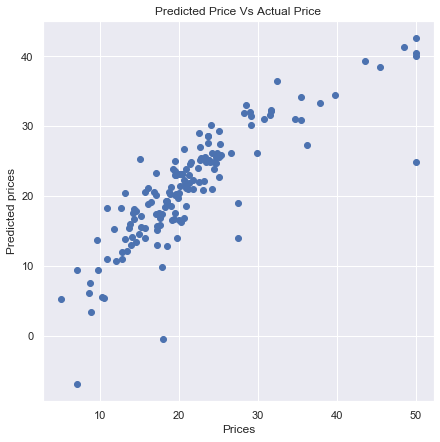

In [16]:
#The data should be linear in nature
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Predicted Price Vs Actual Price")
plt.show()

#The relationship between predicted and actual is linear

In [17]:
#Mean of Residuals should be zero
residuals = diff
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))


Mean of Residuals 0.07773628465359901


In [18]:
#Well the mean of residuals is close to zero..so it should be good

In [19]:
#No multi-collinearity

print("From the heatmap we can understand that there are independent variables that are strongly correlated")

From the heatmap we can understand that there are independent variables that are strongly correlated


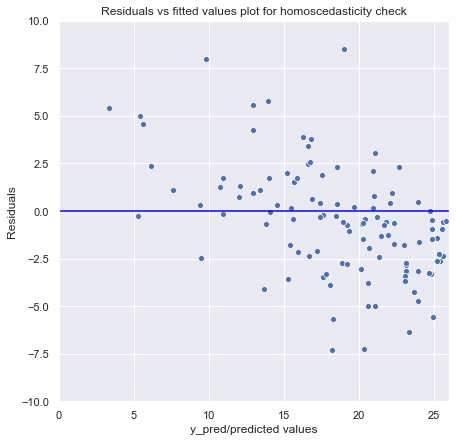

In [20]:
#No Homoscedacity
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [22]:
# Goldfeld Quandt Test
# Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

# Null Hypothesis: Error terms are homoscedastic
# Alternative Hypothesis: Error terms are heteroscedastic.
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 3.019691730304036), ('p-value', 1.0000554140476226e-05)]

In [23]:
print("The p value {} is less than 0.05 and we can reject the null hypothesis that error terms are homoscedatic".format(test[1]))

The p value 1.0000554140476226e-05 is less than 0.05 and we can reject the null hypothesis that error terms are homoscedatic


In [25]:
# Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.
# Null Hypothesis: Autocorrelation is absent.
# Alternative Hypothesis: Autocorrelation is present.
    
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 20)[1])

0.06071115525975659

In [26]:
print("The  jungbox values {} is greater than 0.05 and we can accept the null hypothesis that autocorrelation is absent".format(0.0607))

The  jungbox values 0.0607 is greater than 0.05 and we can accept the null hypothesis that autocorrelation is absent


The above model has violated almost all the assumptions of linear regression and wouldnt be a good fit to carry for prediction.